In [1]:
# load data from multiple data source
import tushare as ts
import numpy as np
import pandas as pd

tushare_token = '1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72'  
# 请在 tushare.pro 网站注册并且告知学生身份，可以取得你的token
pro = ts.pro_api(tushare_token)

In [2]:
def collect_stock_data_pro(code, start_date, end_date):
    try:
        stk_data = pro.daily(ts_code = code, start_date =start_date , end_date = end_date)
        
        return stk_data
    except:
        print('Stock '+code+' could not collect from Tushare Pro')

In [3]:
def random_pick_stocks_code_pro(n): 
    stock_list = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
    ind = [x[0] for x in list(np.random.randint(low = 0, high = len(stock_list), size = (n, 1)))]
    return list(stock_list.iloc[ind]['ts_code'])


In [4]:
start_date='20170701'
end_date='20200730'
n = 3 # number of stocks you wanna collect from Tushare

codes = random_pick_stocks_code_pro(n)
stock_list = []
for c in codes:
    stock_info = {}
    stock_info['code'] =  c
    stock_info['data'] = collect_stock_data_pro(c, start_date, end_date)
    stock_list.append(stock_info)

### The Sharpe Ratio

The Sharpe ratio is perhaps the most widely used tool for evaluating the risk-adjusted rate of return on investment portfolios. It does so by comparing the actual or expected return on an investment to the return on a risk-free investment, such as bond. It compares the two rates of return, factoring in the standard deviation for the investment portfolio, to provide an investor with an idea of how much additional gain he or she is receiving (if any) in return for taking on the additional risk associated with investing in equities.

#### Daily Stock Returns and Sharpe Ratio Calculation
- Calculate the daily stock returns for the two investment opportunities i.e. stocks and CIS300 and name as “stock_returns” and “benchmark_returns”.
- Calculate the relative performance of stocks vs. the benchmark by taking the difference in returns between stock_returns and benchmark_returns for each day. Name it as “excess_returns”.
- Calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark. Name it as “avg_excess_returns”.
- Calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the benchmark. Name it as “std_excess_returns”.
- Compute the ratio of avg_excess_returns and std_excess_returns. The result is now finally the Sharpe ratio and indicates how much more or less return the investment opportunity under consideration yields per unit of risk.
- Note that Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we’ll use the square root of the number of trading days.

In [ ]:
# calculate daily stock returns for the banks
stock_returns = stock_list[0]['data'].pct_chg

# calculate daily stock returns for S&P
benchmark_returns = benchmark.pct_change()

# calculate the difference in daily returns for stocks vs S&P
excess_returns = stock_returns.sub(benchmark_returns, axis=0)

# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='Average of excess return')

In [ ]:
# calculate the standard deviation for daily excess return
std_excess_return = excess_returns.std()
std_excess_return.plot.bar(title='Standard Deviation of the excess return')

In [ ]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(std_excess_return)
# annualize the sharpe ratio
ann = np.sqrt(len(benchmark))
annual_sharpe_ratio = daily_sharpe_ratio.mul(ann)
annual_sharpe_ratio.plot.bar(title='Sharpe Ratio: Stocks vs CIS 300')

#### Information Ratio

The information ratio in finance is one of the most important ratios in **active management**. The appraisal ratio measures the level of outperformance of an active strategy over the benchmark. 

$$IR = \frac{E(r_s-r_b)}{std(r_s-r_b)}$$

where $r_s$ is the strategy return and $r_b$ is the benchmark return, and the $std(r_s-r_b)$ could be interpreted as the **tracking error**. The difference between both is the **active return**. As such, the IR is equal to the expected active return divided by the tracking error. In other words, the ratio measures the active return of the investor's strategy divided by the amount of risk that he takes relative the the benchmark. 

##### Key Concept

1. The information ratio is a measurement of portfolio returns above the returns of a benchmark. 
2. The information ratio is used to evaluate the skill of a portfolio manager at generating returns in excess of a given benchmark.
3. A higher (0.3 - 0.4 would be fairly good) IR result implies a better portfolio manager who's achieving a higher return in excess of the benchmark, given the risk taken


The information ratio identifies how much a fund has exceeded a benchmark. Higher information ratios indicate a desired level of consistency, whereas low information ratios indicate the opposite. Many investors use the information ratio when selecting exchange-traded funds (ETFs) or mutual funds based on their preferred risk profiles. Of course, past performance is not an indicator of future results, but the IR is used to determine whether a portfolio is exceeding a benchmark index fund.

#### Limitation
Comparing multiple funds against a benchmark is difficult to interpret because the funds might have different securities, asset allocations for each sector and entry points in their investments. As with any single financial ratio, it's best to look at additional types of ratios and other financial metrics to make a more comprehensive and informed investment decision.

### Sortino Ratio
The Sortino ratio is a variation of the Sharpe ratio that differentiates **harmful volatility** from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.

#### Formula and Calculation of Sortino Ratio
$$\frac{r_s-r_f}{\delta_d}$$

where $r_s$ is the actual strategy return, $r_f$ is the risk-free rate and $\delta_d$ is standard deviation of the downside

#### Key points
- The Sortino ratio differs from the Sharpe ratio in that it only considers the standard deviation of the downside risk, rather than that of the entire (upside + downside) risk.
- Because the Sortino ratio focuses only on the negative deviation of a portfolio's returns from the mean, it is thought to give a better view of a portfolio's risk-adjusted performance since positive volatility is a benefit.
- The Sortino ratio is a useful way for investors, analysts, and portfolio managers to evaluate an invesment's return for a given level of bad risk.

#### Maximum drawdown

Maximum drawdown is defined as the **peak-to-trough decline** of an investment during a specific period. It is usually quoted as a percentage of the peak value. The maximum drawdown can be calculated based on absolute returns, in order to identify strategies that suffer less during market downturns, such as low-volatility strategies. However, the maximum drawdown can also be calculated based on returns relative to a benchmark index, for identifying strategies that show steady outperformance over time.

We use maximum drawdown as one of the key statistics for evaluating our quantitative investment strategies

$$MDD_T = \frac{(P-L)}{P}$$

where $P$ is the peak value before largest drop during preiod $T$, and $L$ is the lowest value before new high estabilished

- Maximum drawdown (MDD) is a measure of an asset's largest price drop from a peak to a trough.
- Maximum drawdown is considered to be an indicator of downside risk, with large MDDs suggesting that down movements could be volatile.

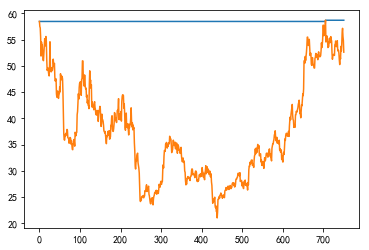

64

In [39]:
import matplotlib.pyplot as plt
stk = stock_list[0]['data']['close']
#plt.plot(stk)
#plt.show()
plt.plot(stk.expanding().max())
plt.plot(stk)
plt.show()
def maxdd(prices):
    # prices should be a series
    return round(abs(prices.sub(prices.expanding().max(), axis=0).div(prices.expanding().max(), axis=0).min()) * 100)
